In [6]:
import pandas as pd
import numpy as np
dataframe = pd.read_csv('../../datasets/sepsis/training_setA/training/p000001.psv',sep='|') # sample file of a patient

In [7]:
dataframe.columns
#these are all the vital signs and laboratory values

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [8]:
def read_data(input_file):
    with open(input_file, 'r') as f:
        header = f.readline().strip()
        column_names = header.split('|')
        values = np.loadtxt(f, delimiter='|')
    # ignore SepsisLabel column if present
    if column_names[-1] == 'SepsisLabel':
        #dataset_labels=values[:,-1]
        column_names = column_names[:-1]
        values = values[:, :-1]
    return (values, column_names)

In [9]:

def get_sepsis_score(values, column_names):
    x_mean = np.array([
        83.8996, 97.0520,  36.8055,  126.2240, 86.2907,
        66.2070, 18.7280,  33.7373,  -3.1923,  22.5352,
        0.4597,  7.3889,   39.5049,  96.8883,  103.4265,
        22.4952, 87.5214,  7.7210,   106.1982, 1.5961,
        0.6943,  131.5327, 2.0262,   2.0509,   3.5130,
        4.0541,  1.3423,   5.2734,   32.1134,  10.5383,
        38.9974, 10.5585,  286.5404, 198.6777])
    x_std = np.array([
        17.6494, 3.0163,  0.6895,   24.2988, 16.6459,
        14.0771, 4.7035,  11.0158,  3.7845,  3.1567,
        6.2684,  0.0710,  9.1087,   3.3971,  430.3638,
        19.0690, 81.7152, 2.3992,   4.9761,  2.0648,
        1.9926,  45.4816, 1.6008,   0.3793,  1.3092,
        0.5844,  2.5511,  20.4142,  6.4362,  2.2302,
        29.8928, 7.0606,  137.3886, 96.8997])
    c_mean = np.array([60.8711, 0.5435, 0.0615, 0.0727, -59.6769, 28.4551])
    c_std = np.array([16.1887, 0.4981, 0.7968, 0.8029, 160.8846, 29.5367])

    x = values[:, 0:34] #lab values and vital signs
    c = values[:, 34:40] #demographics
    x_norm = np.nan_to_num((x - x_mean) / x_std)
    c_norm = np.nan_to_num((c - c_mean) / c_std)

    beta = np.array([
        0.1806,  0.0249, 0.2120,  -0.0495, 0.0084,
        -0.0980, 0.0774, -0.0350, -0.0948, 0.1169,
        0.7476,  0.0323, 0.0305,  -0.0251, 0.0330,
        0.1424,  0.0324, -0.1450, -0.0594, 0.0085,
        -0.0501, 0.0265, 0.0794,  -0.0107, 0.0225,
        0.0040,  0.0799, -0.0287, 0.0531,  -0.0728,
        0.0243,  0.1017, 0.0662,  -0.0074, 0.0281,
        0.0078,  0.0593, -0.2046, -0.0167, 0.1239])
    rho = 7.8521
    nu = 1.0389

    xstar = np.concatenate((x_norm, c_norm), axis=1)
    exp_bx = np.exp(np.matmul(xstar, beta))
    l_exp_bx = pow(4 / rho, nu) * exp_bx

    scores = 1 - np.exp(-l_exp_bx)
    labels = (scores > 0.45) # 0.45 threshold
    return (scores, labels)

either normalize the values and try multiple thresholds to obtain best model or directly use the sepsis labels from the dataset for training

In [ ]:
#dataset_labels

In [ ]:
column_names[34:40]

['Age', 'Gender', 'Unit1', 'Unit2', 'HospAdmTime', 'ICULOS']

In [2]:
import os
import os.path

In [12]:
os.getcwd()

'C:\\Users\\rahan\\Desktop\\sepsis_prediction_code\\1sepsis_pred'

In [10]:
(values, column_names) = read_data('../../datasets/sepsis/training_setA/training/p000001.psv')

In [11]:
import pandas as pd
patientFile = pd.DataFrame(values, columns = column_names)
#Final Sepsis column has been removed if present in input file.]
patientFile

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,83.14,0.0,NaN,NaN,-0.03,1.0
1,97.0,95.0,NaN,98.0,75.33,NaN,19.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,83.14,0.0,NaN,NaN,-0.03,2.0
2,89.0,99.0,NaN,122.0,86.00,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,83.14,0.0,NaN,NaN,-0.03,3.0
3,90.0,95.0,NaN,NaN,NaN,NaN,30.0,NaN,24.0,NaN,...,NaN,NaN,NaN,NaN,83.14,0.0,NaN,NaN,-0.03,4.0
4,103.0,88.5,NaN,122.0,91.33,NaN,24.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,83.14,0.0,NaN,NaN,-0.03,5.0
5,110.0,91.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,83.14,0.0,NaN,NaN,-0.03,6.0
6,108.0,92.0,36.11,123.0,77.00,NaN,29.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,83.14,0.0,NaN,NaN,-0.03,7.0
7,106.0,90.5,NaN,93.0,76.33,NaN,29.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,83.14,0.0,NaN,NaN,-0.03,8.0
8,104.0,95.0,NaN,133.0,88.33,NaN,26.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,83.14,0.0,NaN,NaN,-0.03,9.0
9,102.0,91.0,NaN,134.0,87.33,NaN,30.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,83.14,0.0,NaN,NaN,-0.03,10.0


measurements in a single row is at a singular time, and all rows are at a time difference of min 8 hours and max 2 weeks.


In [ ]:
import seaborn as sns

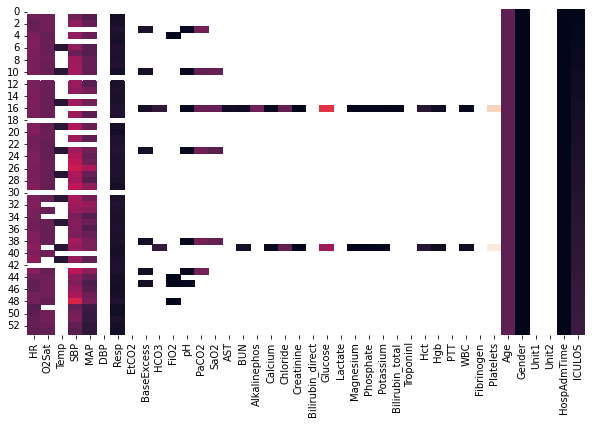

In [ ]:
#visualising missing values
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]

sns.heatmap(patientFile, cbar = False)

vital signs are recorded every hour but lab values are recorded every 24 hours, hence NaN values
Challenge: eliminate missing values 
either interpolation to fill values in rows, or drop columns with more missing %

In [ ]:
(scores, labels) = get_sepsis_score(values, column_names)


In [ ]:
pred=pd.DataFrame({'Scores': scores, 
              'Labels': 1*labels})

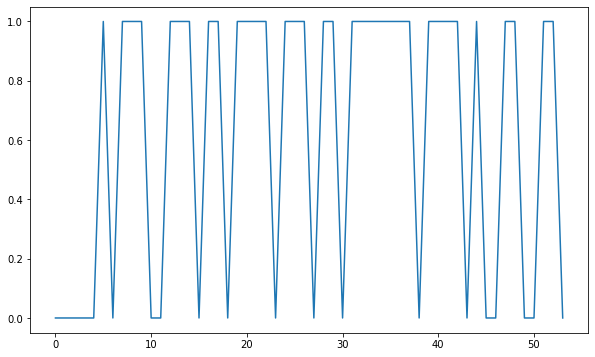

In [ ]:
import matplotlib.pyplot as plt
plt.plot(labels)

In [ ]:
labels

array([False, False, False, False, False,  True, False,  True,  True,
        True, False, False,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True, False,  True,
       False, False,  True,  True, False, False,  True,  True, False])

In [ ]:
#ratio of true classes/false classes
r=np.sum(labels)/labels.shape[0]

In [ ]:
r
#if imbalance found, inseat of oversampling/undersampling
# use SMOTE Synthetic Minority Oversampling Technique (data augmentation for minority classes)

0.6296296296296297

Now, data cleaning and find class imbalance (combine all files)

next, feature selection (background research and trials)

In [5]:
# function to fill missing values
def impute_missing_vals(df, attributes):
    """
    function that imputes missing values.
    @param df: dataframe that has missing values to be
               imputed
           attributes: list of String, attributes of dataframe
    @return df_clean: dataframe without missing values
    """
    """
    fill missing values by the closest values first
    ffill to fill missing values in the tail
    bfill to fill missing values in the head
    """
    # copy df
    df_clean = df.copy()
    for att in attributes:
        if df_clean[att].isnull().sum() == len(df_clean):
            df_clean[att] = df_clean[att].fillna(0)
        elif df_clean[att].isnull().sum() == len(df_clean) - 1:
            df_clean[att] = df_clean[att].ffill().bfill()
        else:
            df_clean[att] = df_clean[att].interpolate(method='nearest', limit_direction='both')
            df_clean[att] = df_clean[att].ffill().bfill()
    
    return df_clean

In [33]:
import os
data_path = 'C:\\Users\\rahan\\Desktop\\datasets\\sepsis\\training_setA\\training'
patients = [p for p in sorted(os.listdir(data_path))]
patient_id = sorted(os.listdir(data_path))

In [20]:
len_train = round(0.7*len(patient_id))+1
len_val = round(0.15*len(patient_id))
len_test = round(0.15*len(patient_id))
len_train + len_val + len_test == len(patient_id)

True

In [21]:
import random
train_id = random.sample(patient_id, len_train)
val_id = random.sample(set(patient_id) - set(train_id), len_val)
test_id = set(patient_id) - set(train_id) - set(val_id)

In [32]:
os.getcwd()

'C:\\Users\\rahan\\Desktop\\sepsis_prediction_code\\1sepsis_pred'

In [44]:
data_train = 'C:\\Users\\rahan\\Desktop\\datasets\\sepsis\\training_setA\\raw\\training'
data_val = 'C:\\Users\\rahan\\Desktop\\datasets\\sepsis\\training_setA\\raw\\validation'
data_test = 'C:\\Users\\rahan\\Desktop\\datasets\\sepsis\\training_setA\\raw\\test'

In [37]:
from tqdm import tqdm

In [35]:
for p in train_id:
    df = pd.read_csv(data_path + '/' + p, sep = "|")
    df.to_csv(data_train  + p, sep='|', index = False) 

In [39]:
for p in tqdm(val_id):
    df = pd.read_csv(data_path + '/' + p, sep = "|")
    df.to_csv(data_val + p, sep='|', index = False)

100%|██████████| 3050/3050 [01:09<00:00, 44.13it/s]


In [46]:
for p in test_id:
    df = pd.read_csv(data_path + '/' + p, sep = "|")
    df.to_csv(data_test + p, sep='|', index = False)

In [48]:
# impute missing values and create clean dfs for all patients
for p in tqdm(patient_id):
    
    # read in patient data
    df = pd.read_csv(data_path + '/' + p, sep = "|")
    attributes = df.columns[:-1]
    
    # impute missing values
    df_clean = impute_missing_vals(df, attributes)
    
    # drop unit1 and unit2 with half missing values
    # because these two features have few information
    # drop EtCO2 with all missing values
    df_clean = df_clean.drop(['Unit1', 'Unit2', 'EtCO2'], axis=1)
    
    # save new patient data
    if p in train_id:
        save_path = 'C:\\Users\\rahan\\Desktop\\datasets\\sepsis\\training_setA\\baseline\\train_baseline\\'
        df_clean.to_csv(save_path + p, sep='|', index = False)        
    
    elif p in val_id:
        save_path = 'C:\\Users\\rahan\\Desktop\\datasets\\sepsis\\training_setA\\baseline\\val_baseline\\'
        df_clean.to_csv(save_path + p, sep='|', index = False)        
    
    else:
        
        save_path = 'C:\\Users\\rahan\\Desktop\\datasets\\sepsis\\training_setA\\baseline\\test_baseline\\'
        df_clean.to_csv(save_path + p, sep='|', index = False)

100%|██████████| 20336/20336 [09:40<00:00, 35.03it/s]


In [50]:
def concat_patients(train_dir, patient_list):
    
    """
    concatenate individual patient dataframe for
    the training, valid, or other dataframes to define
    lower and upper bound of each feature.
    
    @params: train_dir: String, data folder
             patient_list: list of Strings, individual patient files
    
    @return: dataframe, concatenated training or valid data
    """
    
    # read in first patient in patient list
    p = pd.read_csv(train_dir + '/' + patient_list[0], sep = "|")
    p['patient_id'] = patient_list[0][1:7]

    for i in range(1, len(patient_list)):
        p_n = pd.read_csv(train_dir + '/' + patient_list[i], sep = "|")
        p_n['patient_id'] = patient_list[i][1:7]
        p = p.append(p_n)
    return p

In [49]:
train_dir = 'C:\\Users\\rahan\\Desktop\\datasets\\sepsis\\training_setA\\baseline\\train_baseline\\'
valid_dir = 'C:\\Users\\rahan\\Desktop\\datasets\\sepsis\\training_setA\\baseline\\val_baseline\\'
test_dir = 'C:\\Users\\rahan\\Desktop\\datasets\\sepsis\\training_setA\\baseline\\test_baseline\\'

tr_patients = [p for p in sorted(os.listdir(train_dir))]
vld_patients = [p for p in sorted(os.listdir(valid_dir))]
ts_patients = [p for p in sorted(os.listdir(test_dir))]

print('num training patients:', len(tr_patients))
print('num valid patients:', len(vld_patients))
print('num test patients:', len(ts_patients))

num training patients: 14236
num valid patients: 3050
num test patients: 3050


In [51]:
import pickle
#concate patients
train_df = concat_patients(train_dir, tr_patients)
valid_df = concat_patients(valid_dir, vld_patients)
test_df = concat_patients(test_dir, ts_patients)

# save dataframes to pickle files
with open('data_baseline.pickle', 'wb') as f:
    pickle.dump([train_df, valid_df, test_df], f)
